<a href="https://colab.research.google.com/github/aaaksenova/RussianConstructicon_NLP_tools/blob/change/Construction_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Визуализация статистики по конструкциям

Подсчет распределения конструкций по семантическим и синтаксическим типам. Самые частотные якоря по частям речи. 

by Аня Аксенова (akanna_a@mail.ru)

In [ ]:
! pip install spacy --upgrade
! python -m spacy download ru_core_news_md

In [1]:
from google.colab import auth
import pandas as pd
auth.authenticate_user()
import gspread
import spacy
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
import re
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [2]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1FU3qyx1VGtPZrMkww6C40lhryRKVVMatd2nOIo_ezVQ/edit?usp=sharing')

In [3]:
sheet = wb.worksheet('Database for Radovan')

In [9]:
df = pd.DataFrame(sheet.get_all_values())
df.columns = df.iloc[1]
df = df.iloc[2:]

In [16]:
df

1,References,Family,Status,ID Number,Name,Name UD,Illustration,CEFR level,Definition in Russian,Definition in English,Definition in Norwegian,Example 1,Example 2,Example 3,Example 4,Example 5,Morphology,Synt. type of construction,Synt. func. of anchor,Synt. structure of anchor,Part of speech of anchor,SemType1,SemSubType1,SemType2,SemSubType2,SemType3,SemSubType3,SemType4,SemSubType4,Semantic role,Communicative type,Usage label,Anchor words,Common fillers,Comment,Dependency Structure,Dependency Structure of Illustration,Actionality,Actuality,Additive,...,Condition,Concession,Consequence,Degree of accuracy,Degree of intensity,Discourse structure,Epistemic modality (Degree of certainty),Exceptive,Exclusive,Inclusive,Instrument,Manner,Measure,Mirative,Non-existence,Non-Standard Subject,Options,Phase of action,Pluractionality,Polarity value,Possession,Prohibition,Purpose,Quantification,Reaction to the previous discourse,Request,Result,Root modality,Routine,Salient property,Source of information,Source of opinion,Spatial expression,Subset,Taxis,Temporal expression,Temporary characteristics,Timeline,Threat,Volition
2,No references,,ЕВ,3,(а) как же NP-Nom?,(а) как же NP-Nom?,А как же мама?,A1,"Конструкция используется для того, чтобы напом...",The construction is used to remind the address...,Konstruksjonen anvendes for å minne adressaten...,Иван поднял голову и спросил: ― А как же [я]Th...,"― Всё, ― объявил водитель, ― дальше не поеду. ...","В нашем городе ему предложили хорошую работу, ...",Но как только разговор заходит о семейном обуч...,В деревне делали более лёгкую пиццу: тесто пол...,"NP, Nom",Clause,Praedicаtive Expression,Not Applicable,"Conjunction, Pronoun, Particle",Reaction to the previous discourse,Surprise,Mirative,,,,,,Theme,Interrogative,NA,"а, как, же",,No comment yet,[root как [advmod же] [nsubj NP-Nom]]+[root [c...,[root [cc А] как [advmod же] [nsubj мама]?],,,,...,,,,,,,,,,,,,,Unspecified,,,,,,,,,,,Surprise,,,,,,,,,,,,,,,
3,No references,,ЕВ,4,(а) при чём здесь/тут Cop NP-Nom?,(а) при чём здесь/тут Cop NP-Nom?,При чём здесь наши отношения?,A2,Конструкция используется для выражения недоуме...,The construction is used to express the speake...,Konstruksjonen anvendes for å uttrykke at tale...,"Но при чём здесь [недостатки]Theme, когда речь...","― А при чём тут [я]Theme, ― удивилась Ирина.","Я спросил его, при чём здесь [приезжие гости]T...","― Кредит, ― сказал он грозно, ― портит отношен...",А у нас даже третьей комнаты нет… Мама не поня...,"Cop, NP, Nom",Copula Construction,Praedicаtive Expression,Prepositional Phrase,"Conjunction, Preposition, Pronoun, Adverb",Reaction to the previous discourse,Surprise,,,,,,,Theme,Interrogative / Exclamatory,NA,"а, при, чём, здесь, тут","я, он",No comment yet,[root [case при] чём [advmod здесь] [cop Cop] ...,[root [case При] чём [advmod здесь] [det наши]...,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,Surprise,,,,,,,,,,,,,,,
4,No references,,ЕВ,5,"(а) Noun-Nom/кто (же) (PronPers-3.Acc) знает, Cl","(а) N-Nom/кто (же) (PronPers-3.Acc) знает, Cl","Кто его знает, почему она так поступила.",C1,"Конструкция обозначает, что по мнению говоряще...",,Konstruksjonen anvendes for å uttrykke at tale...,"[Чёрт]Cognizer [его]Topic знает, [что она вчер...","[Бог]Cognizer [его]Topic знает, [где они сейча...","― [Шут]Cognizer [его]Topic знает, [как оно пол...","[Чёрт]Cognizer [ее]Topic знает, [что у нее там...","[Бог]Cognizer [их]Topic знает, [зачем они прие...","Noun, Nom, Cl",Matrix and Sentential Complement Construction,Matrix Predicate,Subject + Predicate,"Conjunction, Pronoun, Particle, Verb",Epistemic modality,Low degree of certainty,,,,,,,"Content, Cognizer, Topic",Declarative,Colloquial,"а, кто, же, его, её, их, знает","бог, чёрт, шут, пёс, бес, господь, леший, дьявол",No comment yet,[root [nsubj Noun-Nom] [obj PronPers-3.Acc] зн...,"[root [nsubj Кто] [obj его] знает, [advmod поч...",,,,...,,,,,,,Low degree of certainty,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,No references,,EV3,6,(а/так) что насчёт XP?,(а/та

## Распределение конструкций по семантическим типам

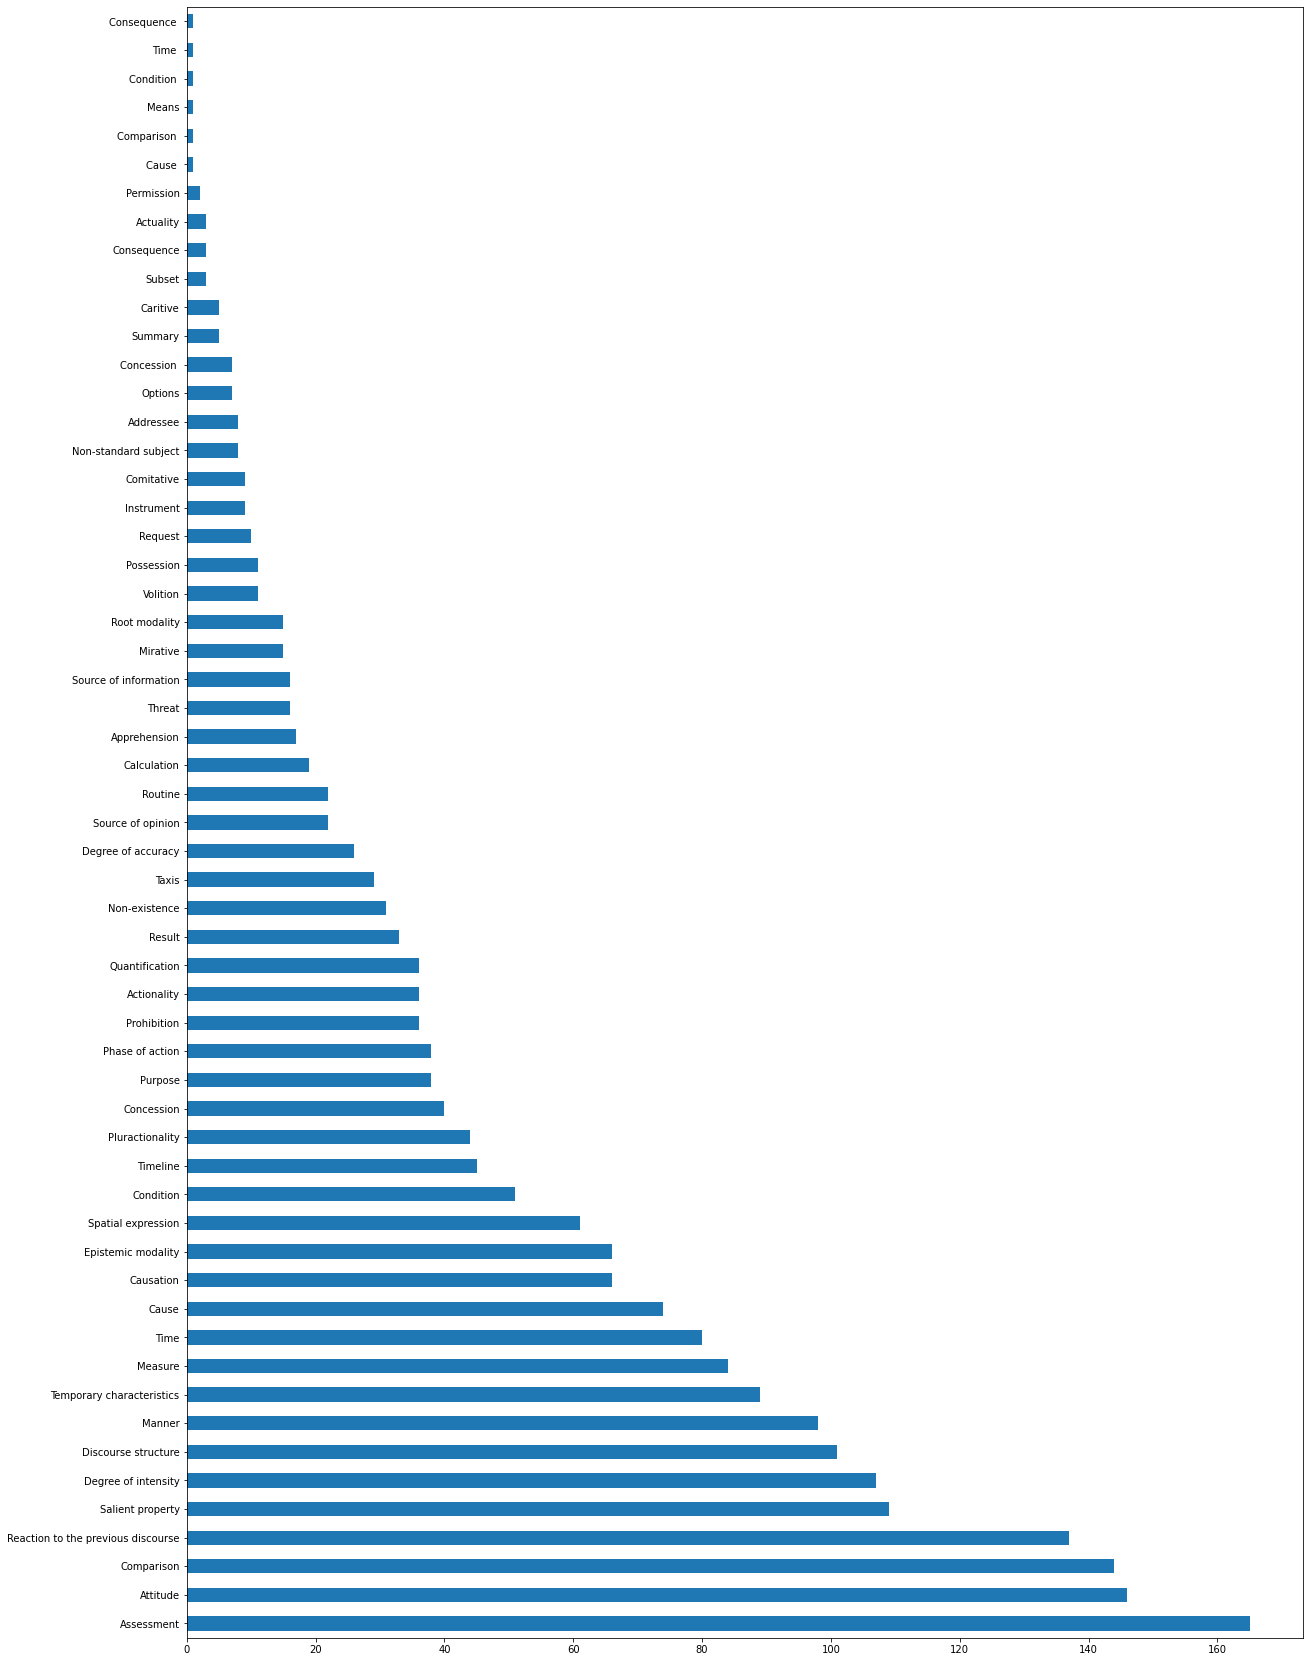

In [19]:
df.SemType1.value_counts().plot(kind='barh', figsize=(20, 30))

## Распределение конструкций по синтаксическим типам

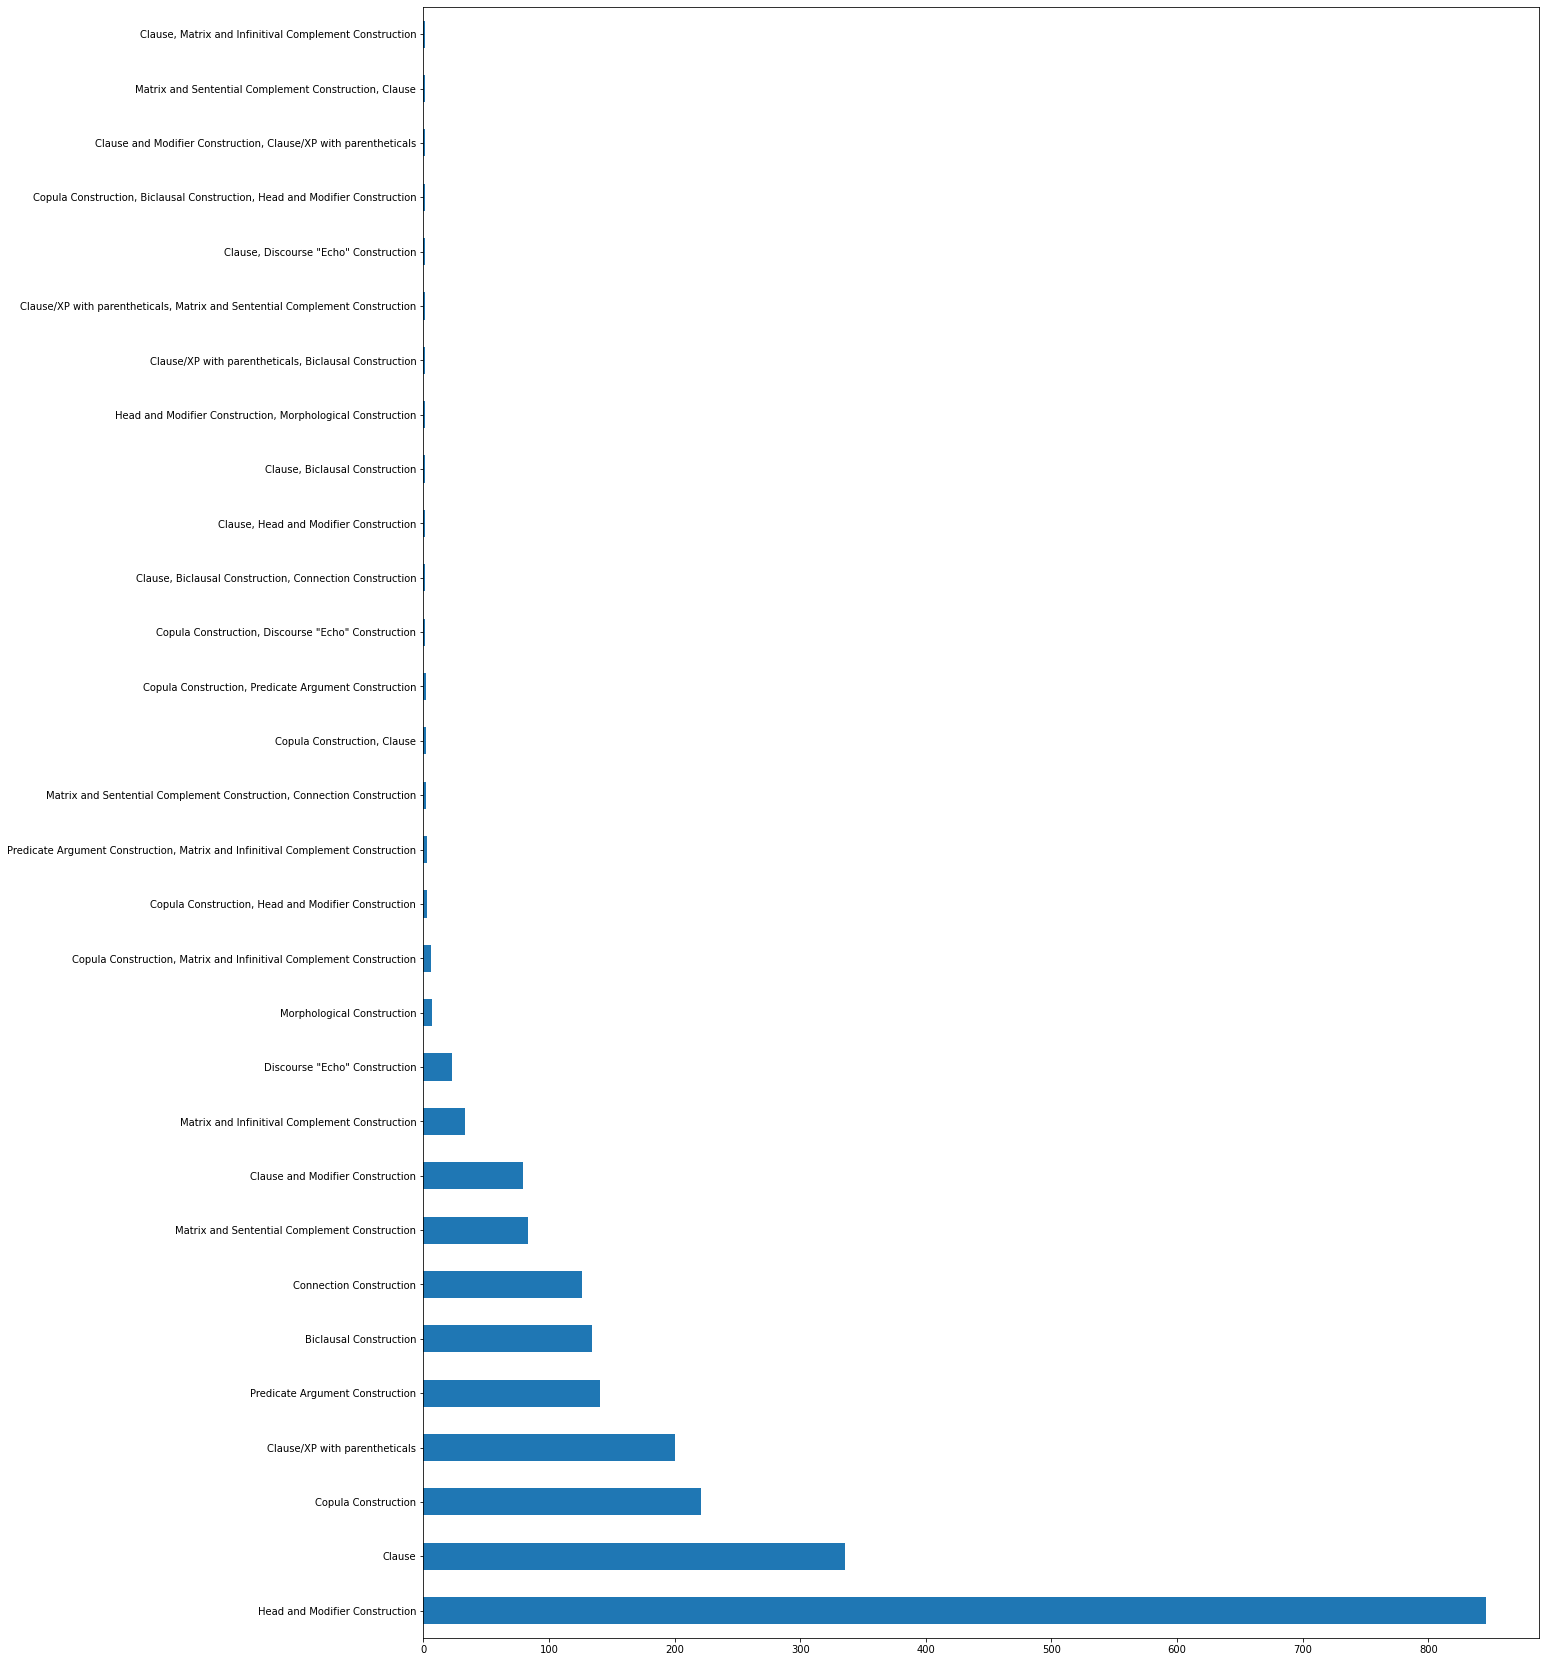

In [38]:
df['Synt. type of construction'].value_counts().plot(kind='barh', figsize=(20, 30))

## Топ частотных якорей

In [22]:
constr = df.Name.tolist()
constr = ' '.join([re.sub(r'[\(\)~\-/1234567890\.A-Za-z]', ' ', c) for c in constr])

In [26]:
nlp = spacy.load('ru_core_news_md')

In [31]:
def preprocess(text, model):
    """
    Function takes text from file or variable,
    deletes all characters that are not letters,
    and transforms words into lowercase lemmas
    joined by whitespace
    """

    docum = model(text)
    p = [(w.lemma_, w.pos_ )for w in docum]
    words = [i[0] for i in p]
    poses = [i[1] for i in p]
    pos_dict = {p: [] for p in list(set(poses))}
    for word, pos in zip(words, poses):
        pos_dict[pos].append(word)
    return pos_dict

In [32]:
pos_dict = preprocess(constr, nlp)

In [33]:
pos_dict.keys()

dict_keys(['CCONJ', 'PROPN', 'VERB', 'ADP', 'PART', 'ADJ', 'SPACE', 'SCONJ', 'PRON', 'ADV', 'DET', 'NUM', 'AUX', 'NOUN', 'PUNCT', 'X'])

### Топ-10 глаголов

In [39]:
Counter(pos_dict['VERB']).most_common(10)

[('знать', 24),
 ('говорить', 22),
 ('хотеть', 18),
 ('быть', 16),
 ('дать', 16),
 ('нет', 16),
 ('сказать', 15),
 ('мочь', 15),
 ('иметь', 12),
 ('делать', 8)]

### Топ-10 существительных

In [40]:
Counter(pos_dict['NOUN']).most_common(10)

[('время', 26),
 ('дело', 25),
 ('раз', 25),
 ('чёрт', 18),
 ('пора', 16),
 ('день', 16),
 ('случай', 15),
 ('вид', 15),
 ('рука', 13),
 ('слово', 12)]

### Топ-10 прилагательных

In [41]:
Counter(pos_dict['ADJ']).most_common(10)

[('равный', 19),
 ('хороший', 14),
 ('самый', 9),
 ('сам', 8),
 ('полный', 7),
 ('нужный', 7),
 ('другой', 6),
 ('плохой', 5),
 ('последний', 4),
 ('целый', 4)]

### Топ-10 наречий

In [42]:
Counter(pos_dict['ADV']).most_common(10)

[('так', 64),
 ('ещё', 38),
 ('как', 22),
 ('хоть', 14),
 ('тут', 13),
 ('можно', 13),
 ('надо', 10),
 ('здесь', 9),
 ('там', 9),
 ('куда', 8)]